# Text Representation

**Text representation in Natural Language Processing (NLP) refers to the process of converting raw text data into a format that can be understood and processed by machine learning algorithms. Effective text representation is crucial for various NLP tasks such as text classification, sentiment analysis, machine translation, and more. There are several techniques for representing text, each with its own advantages and use cases. Here are some common methods:**

1. Bag-of-Words (BoW):
2. Term Frequency-Inverse Document Frequency (TF-IDF):
3. Word Embeddings: Word2Vec
4. N grams
5. Custom Features

# One Hot Encoding

**One-Hot Encoding is a technique used to convert categorical variables into a binary vector format that machine learning algorithms can understand and process. It is especially useful when dealing with categorical data in numerical models, as many machine learning algorithms work with numerical inputs. One-Hot Encoding represents each category as a unique binary value (0 or 1) in a vector.**

1. Corpus
2. Vocabulary
3. Document
4. Word

In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

In [2]:
# Sample corpus (collection of color names)
corpus = ['Red', 'Green', 'Blue', 'Green', 'Red']

In [3]:
# Create a DataFrame representing the corpus
df = pd.DataFrame({'Color': corpus})

In [4]:
# Display the original DataFrame
print("Original DataFrame:")
print(df)


Original DataFrame:
   Color
0    Red
1  Green
2   Blue
3  Green
4    Red


In [17]:
# Create a vocabulary from the unique color names
vocabulary = df['Color'].unique()
print(vocabulary)


['Red' 'Green' 'Blue']


In [16]:
# Initialize the OneHotEncoder
encoder = OneHotEncoder()
print(encoder)

OneHotEncoder()


In [14]:
# Fit and transform the 'Color' column
onehot_encoded = encoder.fit_transform(df[['Color']]).toarray()
print(onehot_encoded)


[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [15]:
# Convert the one-hot encoded array back to a DataFrame
onehot_df = pd.DataFrame(onehot_encoded, columns=vocabulary)
print(onehot_df)

   Red  Green  Blue
0  0.0    0.0   1.0
1  0.0    1.0   0.0
2  1.0    0.0   0.0
3  0.0    1.0   0.0
4  0.0    0.0   1.0


In [13]:
print("\nOne-Hot Encoded DataFrame:")
print(onehot_df)


One-Hot Encoded DataFrame:
   Red  Green  Blue
0  0.0    0.0   1.0
1  0.0    1.0   0.0
2  1.0    0.0   0.0
3  0.0    1.0   0.0
4  0.0    0.0   1.0


# Bag Of Words

**The Bag-of-Words (BoW) model is a fundamental and straightforward technique used in Natural Language Processing (NLP) to represent text data as numerical vectors. It's a simple way to convert text into a format that can be used for various machine learning tasks, such as text classification, sentiment analysis, and more.**

In [18]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
# Sample corpus (collection of text documents)
corpus = [
    "This is the first document.",
    "This document is the second document.",
    "And this is the third one.",
    "Is this the first document?"
]


In [20]:
# Create a DataFrame representing the corpus
df = pd.DataFrame({'Document': corpus})


In [21]:
# Display the original DataFrame
print("Original DataFrame:")
print(df)


Original DataFrame:
                                Document
0            This is the first document.
1  This document is the second document.
2             And this is the third one.
3            Is this the first document?


In [22]:
# Initialize the CountVectorizer
vectorizer = CountVectorizer()

In [23]:
# Fit and transform the text documents
X = vectorizer.fit_transform(df['Document'])
print(X)

#We look at the sorted vocabulary: ["And", "document", "first", "is", "one", "second", "the", "third", "This"].

  (0, 8)	1
  (0, 3)	1
  (0, 6)	1
  (0, 2)	1
  (0, 1)	1
  (1, 8)	1
  (1, 3)	1
  (1, 6)	1
  (1, 1)	2
  (1, 5)	1
  (2, 8)	1
  (2, 3)	1
  (2, 6)	1
  (2, 0)	1
  (2, 7)	1
  (2, 4)	1
  (3, 8)	1
  (3, 3)	1
  (3, 6)	1
  (3, 2)	1
  (3, 1)	1


**In this corpus, the unique words are: "This", "is", "the", "first", "document", "And", "second", "third", "one". They are sorted alphabetically to form the vocabulary.**

**n this output, (0, 8) 1 means that in the first document (document at index 0), the word represented by column index 8 appears 1 time.**

To determine which word corresponds to index 8:

**We look at the sorted vocabulary: ["And", "document", "first", "is", "one", "second", "the", "third", "This"].**
**We find that the word corresponding to index 8 is "This".
Similarly, let's look at (0, 3) 1:**

**We look at the sorted vocabulary: ["And", "document", "first", "is", "one", "second", "the", "third", "This"].**
**We find that the word corresponding to index 3 is "is".
So, the indices in the output correspond to the positions of words in the sorted vocabulary. The correct interpretation is that the word "This" is at index 8, and the word "is" is at index 3 based on the sorted vocabulary. My previous explanations were inaccurate, and I apologize for any confusion caused.**


In [24]:
# Step 3: Convert the sparse matrix to a dense DataFrame
# Convert the sparse matrix X into a DataFrame with word counts
bow_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())


In [25]:
# Display the Bag-of-Words DataFrame
print("\nBag-of-Words DataFrame:")
print(bow_df)


Bag-of-Words DataFrame:
   and  document  first  is  one  second  the  third  this
0    0         1      1   1    0       0    1      0     1
1    0         2      0   1    0       1    1      0     1
2    1         0      0   1    1       0    1      1     1
3    0         1      1   1    0       0    1      0     1


# N-grams

**N-grams are a technique used in Natural Language Processing (NLP) to represent text as a sequence of contiguous word or character groups. An N-gram is a subsequence of N consecutive items (usually words or characters) from a given sequence of text. N-grams capture local patterns and relationships between words or characters, and they are commonly used for various NLP tasks, including language modeling, machine translation, and text analysis.**


### N-grams can be of different sizes, with "N" representing the number of elements in the subsequence. Here are some common types of N-grams:



1. Unigrams (1-grams):
Unigrams are individual words in a text. Each word is treated as a separate element, and no contextual information is captured.

**Example: "The cat is on the mat."
 Unigrams: ["The", "cat", "is", "on", "the", "mat."]**

2. Bigrams (2-grams):
Bigrams consist of pairs of consecutive words. They capture some contextual information by considering pairs of words together.

**Example: "The cat is on the mat."
Bigrams: ["The cat", "cat is", "is on", "on the", "the mat."]**

3. Trigrams (3-grams):
Trigrams consist of groups of three consecutive words. They capture more context than bigrams.

**Example: "The cat is on the mat."
Trigrams: ["The cat is", "cat is on", "is on the", "on the mat."]**

4. N-grams (N > 3):
N-grams of higher order capture even more context and relationships between words.

**Example: "The cat is on the mat."
4-grams: ["The cat is on", "cat is on the", "is on the mat."]
5-grams: ["The cat is on the", "cat is on the mat."]**



In [26]:
import nltk
from nltk import word_tokenize
from nltk.util import ngrams

In [27]:
# Sample text
text = "The cat is on the mat."

In [28]:
# Tokenize the text into words
words = word_tokenize(text)
print(words)

['The', 'cat', 'is', 'on', 'the', 'mat', '.']


In [29]:
# Generate unigrams, bigrams, and trigrams
unigrams = list(ngrams(words, 1))
bigrams = list(ngrams(words, 2))
trigrams = list(ngrams(words, 3))

In [30]:
# Print the generated N-grams
print("Unigrams:", unigrams)
print("Bigrams:", bigrams)
print("Trigrams:", trigrams)

Unigrams: [('The',), ('cat',), ('is',), ('on',), ('the',), ('mat',), ('.',)]
Bigrams: [('The', 'cat'), ('cat', 'is'), ('is', 'on'), ('on', 'the'), ('the', 'mat'), ('mat', '.')]
Trigrams: [('The', 'cat', 'is'), ('cat', 'is', 'on'), ('is', 'on', 'the'), ('on', 'the', 'mat'), ('the', 'mat', '.')]


In [32]:
!pip install networkx

In [33]:
 import nltk
import networkx as nx
import matplotlib.pyplot as plt
from nltk import word_tokenize
from nltk.util import ngrams

In [34]:
# Sample text
text = "Natural language processing is a subfield of artificial intelligence that focuses on the interaction between computers and humans using natural language."

# Tokenize the text into words
words = word_tokenize(text)


In [35]:
# Generate bigrams
bigrams = list(ngrams(words, 2))
print(bigrams)

[('Natural', 'language'), ('language', 'processing'), ('processing', 'is'), ('is', 'a'), ('a', 'subfield'), ('subfield', 'of'), ('of', 'artificial'), ('artificial', 'intelligence'), ('intelligence', 'that'), ('that', 'focuses'), ('focuses', 'on'), ('on', 'the'), ('the', 'interaction'), ('interaction', 'between'), ('between', 'computers'), ('computers', 'and'), ('and', 'humans'), ('humans', 'using'), ('using', 'natural'), ('natural', 'language'), ('language', '.')]


In [36]:
# Create a directed graph
G = nx.DiGraph()
print(G)

DiGraph with 0 nodes and 0 edges


In [47]:
# Add nodes and edges
for bigram in bigrams:
    word1, word2 = bigram
    print(bigram)
    G.add_node(word1)
    G.add_node(word2)
    G.add_edge(word1, word2)


('Natural', 'language')
None
('language', 'processing')
None
('processing', 'is')
None
('is', 'a')
None
('a', 'subfield')
None
('subfield', 'of')
None
('of', 'artificial')
None
('artificial', 'intelligence')
None
('intelligence', 'that')
None
('that', 'focuses')
None
('focuses', 'on')
None
('on', 'the')
None
('the', 'interaction')
None
('interaction', 'between')
None
('between', 'computers')
None
('computers', 'and')
None
('and', 'humans')
None
('humans', 'using')
None
('using', 'natural')
None
('natural', 'language')
None
('language', '.')
None


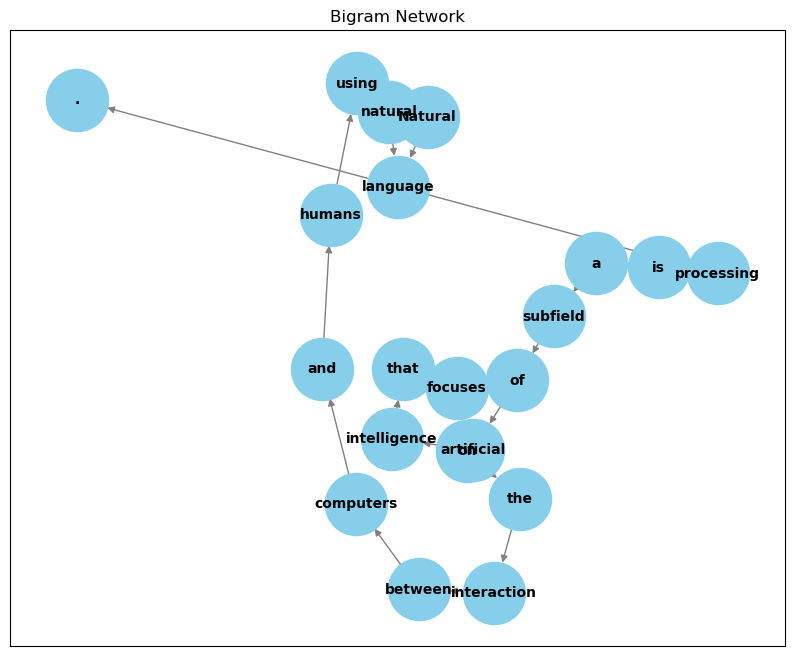

In [40]:
# Draw the network graph using nx.draw_networkx
pos = nx.spring_layout(G)
plt.figure(figsize=(10, 8))
nx.draw_networkx(G, pos, with_labels=True, node_size=2000, node_color="skyblue", font_size=10, font_color="black", font_weight="bold", edge_color="gray")

# Show the graph
plt.title("Bigram Network")
plt.show()


# TF-IDF (Term Frequency-Inverse Document Frequency)

**TF-IDF (Term Frequency-Inverse Document Frequency) is a numerical representation technique commonly used in Natural Language Processing (NLP) to quantify the importance of words in a document relative to a collection of documents (corpus). It's a technique that helps transform text data into numerical vectors, which can be used for various NLP tasks like document similarity, clustering, classification, and more.**

In [48]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [49]:
# Sample corpus (collection of text documents)
corpus = [
    "This is the first document.",
    "This document is the second document.",
    "And this is the third one.",
    "Is this the first document?"
]

In [50]:
# Create a DataFrame representing the corpus
df = pd.DataFrame({'Document': corpus})


In [51]:
# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer()


In [52]:
# Fit and transform the text documents
X = vectorizer.fit_transform(df['Document'])

In [53]:
# Convert the sparse matrix to a dense DataFrame
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

In [54]:
# Display the TF-IDF DataFrame
print(tfidf_df)

        and  document     first        is       one    second       the  \
0  0.000000  0.469791  0.580286  0.384085  0.000000  0.000000  0.384085   
1  0.000000  0.687624  0.000000  0.281089  0.000000  0.538648  0.281089   
2  0.511849  0.000000  0.000000  0.267104  0.511849  0.000000  0.267104   
3  0.000000  0.469791  0.580286  0.384085  0.000000  0.000000  0.384085   

      third      this  
0  0.000000  0.384085  
1  0.000000  0.281089  
2  0.511849  0.267104  
3  0.000000  0.384085  


# TF-IDF Calculation

## Corpus:
1. This **is** the first document.
2. This document **is** the second document.
3. And **this is** the third one.
4. Is **this** the first document?

### Word to Calculate TF-IDF For: "this" (in document 1)
#### Let's calculate the TF-IDF for the word "this" in document 1 using the formula:

**TF-IDF(w, d) = TF(w, d) * IDF(w)**

## Term Frequency (TF):
**The term frequency of "this" in document 1 is 1, because "this" appears once in that document.**

## Inverse Document Frequency (IDF):
**The inverse document frequency of "this" can be calculated as follows: **

**```Number of documents containing "this": 3 (document 1, 2, and 3)
Total number of documents: 4 (the entire corpus)
IDF("this") = log(Total number of documents / Number of documents containing "this")
             = log(4 / 3) ≈ 0.2877```**

# TF-IDF Calculation:

**TF-IDF("this", document 1) = TF("this", document 1) * IDF("this")
                          = 1 * 0.2877 ≈ 0.2877**
                          
  **So, the TF-IDF score for the word "this" in document 1 is approximately 0.2877.**